# **Credit card fraud dection using machine learning** 



In this notebook, I will using ML techniques to detect fraud in a credit card dataset

# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Importing Required Libraries">Importing Required Libraries</a></li>
            <li><a href="#Load in dataset">Load in dataset</a></li>
            </ol>
    </li>
    <li>
        <a href="#Scenario">Scenario</a>
        <ol>
            <li><a href="#Data preparation">Data Description</a></li>
            <li><a href="#Split data into trainign and testing set">Split data into trainign and testing set</a></li>
            <li><a href="#Standardise data">Standardise data</a></li>
        </ol>
    </li>
    </li>
    <li>
        <a href="#Logistic regression">Logistic regression</a>
        <ol>
            <li><a href="#Model development">Model development</a></li>
            <li><a href="#Model accuracy">Model accuracy</a></li>
            <li><a href="#Model performance">Model performance</a></li>
            <li><a href="#Model assessment">Model assessment</a></li>
            <li><a href="#Model imporvement">Model improvement</a></li>
        </ol>
    </li>
</ol>


# Objectives

In this notebook I will predict credit card fraud with:
- Logistic regression
- Supervised ML models



# Setup

### Importing Required Libraries

Libraries required for this notebook will be imported here

In [62]:
import pandas as pd

### Load in data

Data used: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [63]:
data = pd.read_csv("..\data\kaggel_credit_card_fraud_detection\creditcard.csv")
data.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


### Split data into training and testing set

In [64]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=["Time", "Class"])
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   
X_train.shape, X_test.shape, y_train.shape, y_test.shape  

((227845, 29), (56962, 29), (227845,), (56962,))

In [65]:
#check amounts of fraud and non-fraud
y_train.value_counts(), y_test.value_counts()

(Class
 0    227451
 1       394
 Name: count, dtype: int64,
 Class
 0    56864
 1       98
 Name: count, dtype: int64)

### Standardise data

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scenario

Predict credit card fraud various ML models, creating, testing and validating them

### Data Description ###

The dataset used for this visualization project contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. Features V1-V28 have been deduced by PCA, and have names omitted due to confidentiality

The dataset includes the following variables:
<br>1. Time: Seconds elapsed between each transaction and the first transaction in the dataset.
<br>2-29. V1 - V28: Anonymised features deduced by PCA
<br>30. Amount: transaction Amount, this feature can be used for example-dependant cost-sensitive learning
<br>31. Class: Responce varialbe for fraud classification (0 = not fraud, 1 = fraud)




## Logistic regression

### Model development

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



C:\Users\aiden\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model accuracy

In [68]:
from sklearn.metrics import classification_report
#Precision, Recall, and F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.59      0.69        98

    accuracy                           1.00     56962
   macro avg       0.91      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



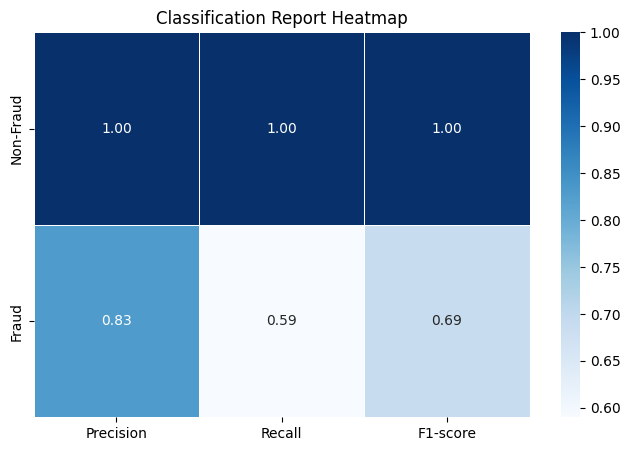

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Metrics from classification report
labels = ["Precision", "Recall", "F1-score"]
fraud = [0.83, 0.59, 0.69]
non_fraud = [1.00, 1.00, 1.00]

# Creating the DataFrame
metrics = np.array([non_fraud, fraud])
df = pd.DataFrame(metrics, columns=labels, index=["Non-Fraud", "Fraud"])

# Plotting
plt.figure(figsize=(8, 5))
sns.heatmap(df, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.show()


In [70]:
from sklearn.metrics import roc_auc_score
y_probs = model.predict_proba(X_test)[:, 1]  # Extracting probabilities for class 1
auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {auc:.4f}")


ROC-AUC Score: 0.9601


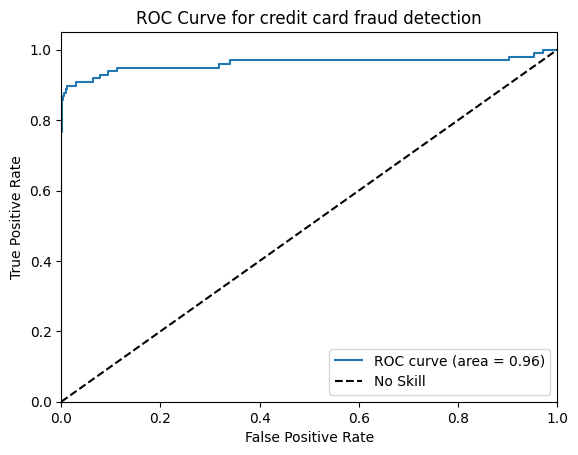

In [71]:
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for credit card fraud detection')
plt.legend()
plt.show()

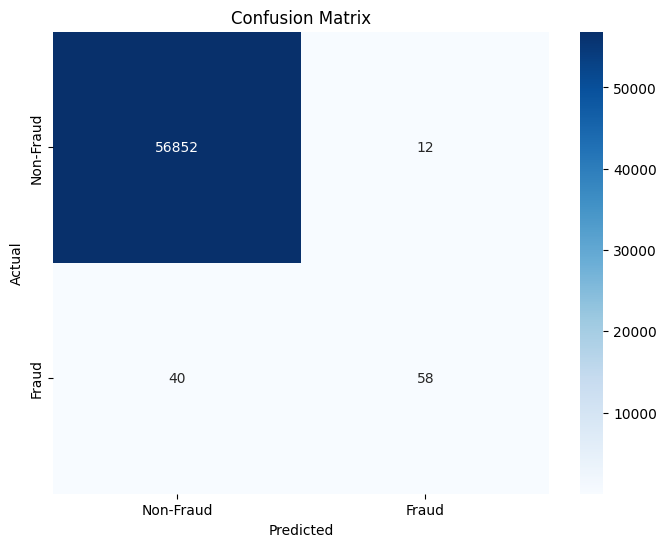

In [72]:
#graph of false positive rate and true positive rate
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [73]:
#compute type I and type II errors
type_I_error = cm[0, 1]  # False Positive
type_II_error = cm[1, 0]  # False Negative
print(f"Type I Error (False Positive): {type_I_error}")
print(f"Type II Error (False Negative): {type_II_error}")
# Calculate the percentage of fraud cases in the dataset
fraud_percentage = (data['Class'].sum() / len(data)) * 100
print(f"Percentage of Fraud Cases: {fraud_percentage:.2f}%")
# Calculate the percentage of non-fraud cases in the dataset
non_fraud_percentage = 100 - fraud_percentage
print(f"Percentage of Non-Fraud Cases: {non_fraud_percentage:.2f}%")
# Calculate the percentage of Type I and Type II errors
type_I_error_percentage = (type_I_error / len(y_test)) * 100
type_II_error_percentage = (type_II_error / len(y_test)) * 100
print(f"Type I Error Percentage: {type_I_error_percentage:.2f}%")
print(f"Type II Error Percentage: {type_II_error_percentage:.2f}%")


Type I Error (False Positive): 12
Type II Error (False Negative): 40
Percentage of Fraud Cases: 0.17%
Percentage of Non-Fraud Cases: 99.83%
Type I Error Percentage: 0.02%
Type II Error Percentage: 0.07%


### Model performance

**Non-Fraud**

Precision - 1.00 - Few if no false positives; Good classification of non-fraudulent transactions

Recall - 1.00 - Model identifies all legitimate transactions

F1-score - 1.00 - Perfect balance of precision and recall

**Fraud**

Precisions - 0.83 - 83% of true positives identified, 17% of fraud predictions are false positives

Recall - Model only catches 59% of actual fraud cases, some cases no identified

F1-score -  Reasonable balance but can be improved

### Model assessment

#### Assessment <br>

Model captured 59% of confirmed fraud in the data; the model has poor recall. Recall is the prefered metric as the data has data entries that are fraud, so we are a concerned with the model being able to correclty identify all positive instances.

The model has a high ability to distinguish between fraudulent and non-fraudulent transactions. However, missing fraudent transactions is most essential to this project. <br>

#### Assessment  <br>
- **Adjust Classification Threshold:** Lowering the threshold can boost recall but may increase false positives.  
- **Balance Precision vs. Recall:** Use precision-recall curves to find an optimal trade-off.  
- **Resampling Techniques:** Oversample fraud cases or undersample non-fraud to address class imbalance.  
- **Feature Engineering:** Enhance fraud detection with time-based trends or network analysis.  
- **Ensemble Methods:** Combine models (e.g., random forest + neural network) for better recall without sacrificing precision.  






### Model assessment <br>

#### Adjusting the calssification threshold <br>
We want to minimise false negatives while keeping false positives manageable

Plot Precision-Recall curve to visualise the trade-off between precision and recall as the threshold changes.

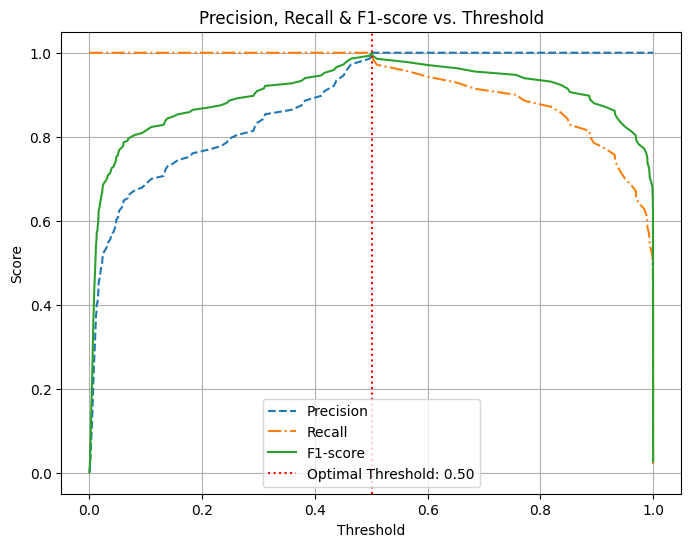

In [74]:
from sklearn.metrics import precision_recall_curve
# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_pred, y_probs)

# Compute F1-score for each threshold
f1_scores = (2 * precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', linestyle='--')
plt.plot(thresholds, recall[:-1], label='Recall', linestyle='-.')
plt.plot(thresholds, f1_scores[:-1], label='F1-score', linestyle='-')

plt.axvline(optimal_threshold, color='red', linestyle='dotted', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall & F1-score vs. Threshold')
plt.legend()
plt.grid()
plt.show()

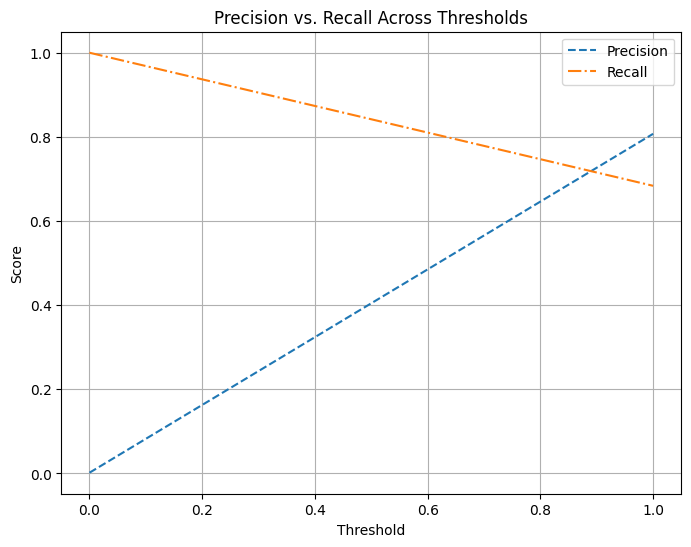

In [75]:
threshold = 0.3  # Set a lower threshold
y_pred_adjusted = (y_probs >= threshold).astype(int)  # Reclassify fraud cases



# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_adjusted)

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', linestyle='--')
plt.plot(thresholds, recall[:-1], label='Recall', linestyle='-.')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs. Recall Across Thresholds')
plt.legend()
plt.grid()
plt.show()




#### Adjusting the calssification threshold <br>
**Reweighting the Loss Function**

Adjusting the loss function to assign higher weight to false negatives can improve recall


In [76]:
from sklearn.utils.class_weight import compute_class_weight

# Convert class labels to a NumPy array
classes = np.array([0, 1])

# Compute class weights
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
weights_dict = {0: class_weights[0], 1: class_weights[1]}  # Map weights

print(f"Class Weights: {weights_dict}")


Class Weights: {0: 0.5008661206149896, 1: 289.14340101522845}


In [77]:

# Initialize model with class weights
model = LogisticRegression(class_weight=weights_dict)

# Train the model
model.fit(X_train, y_train)

C:\Users\aiden\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.5008661206149896, 1: 289.14340101522845})

In [78]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [79]:
#compute type I and type II errors
type_I_error = cm[0, 1]  # False Positive
type_II_error = cm[1, 0]  # False Negative
print(f"Type I Error (False Positive): {type_I_error}")
print(f"Type II Error (False Negative): {type_II_error}")
# Calculate the percentage of fraud cases in the dataset
fraud_percentage = (data['Class'].sum() / len(data)) * 100
print(f"Percentage of Fraud Cases: {fraud_percentage:.2f}%")
# Calculate the percentage of non-fraud cases in the dataset
non_fraud_percentage = 100 - fraud_percentage
print(f"Percentage of Non-Fraud Cases: {non_fraud_percentage:.2f}%")
# Calculate the percentage of Type I and Type II errors
type_I_error_percentage = (type_I_error / len(y_test)) * 100
type_II_error_percentage = (type_II_error / len(y_test)) * 100
print(f"Type I Error Percentage: {type_I_error_percentage:.2f}%")
print(f"Type II Error Percentage: {type_II_error_percentage:.2f}%")


Type I Error (False Positive): 12
Type II Error (False Negative): 40
Percentage of Fraud Cases: 0.17%
Percentage of Non-Fraud Cases: 99.83%
Type I Error Percentage: 0.02%
Type II Error Percentage: 0.07%


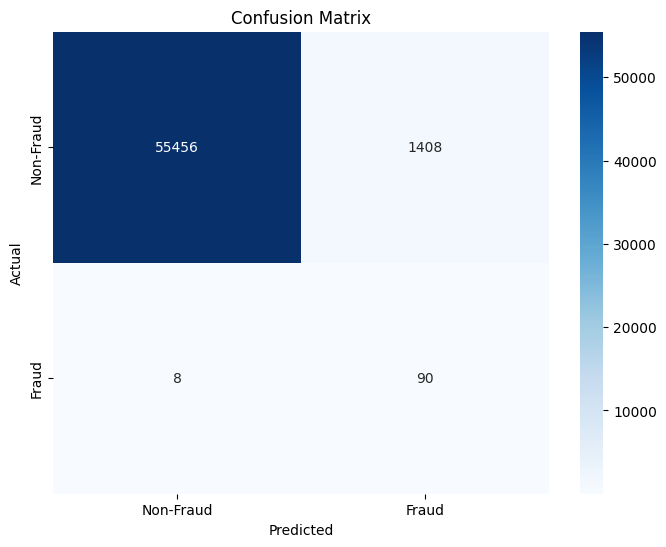

In [80]:
#graph of false positive rate and true positive rate

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [81]:
#Precision, Recall, and F1-score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



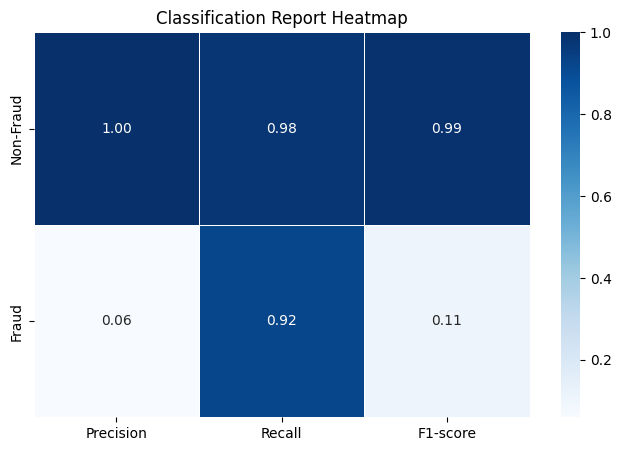

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Metrics from classification report
labels = ["Precision", "Recall", "F1-score"]
fraud = [0.06, 0.92, 0.11]
non_fraud = [1.00, 0.98, 0.99]

# Creating the DataFrame
metrics = np.array([non_fraud, fraud])
df = pd.DataFrame(metrics, columns=labels, index=["Non-Fraud", "Fraud"])

# Plotting
plt.figure(figsize=(8, 5))
sns.heatmap(df, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.show()

Non-Fraud:
- Precision: 1.00 (Excellent—no false positives)
- Recall: 0.98 (Almost all non-fraud cases are correctly detected)
- F1-score: 0.99 (Near-perfect balance of precision & recall)

Fraud:
- Precision: 0.06 (Very low—many false positives)
- Recall: 0.92 (Strong—most fraud cases are detected)
- F1-score: 0.11 (Low—indicating a trade-off where recall is prioritized over precision)

Better recall now but most of only 6% of flagged fraud cases are true positives, improve recall now without compromising recall


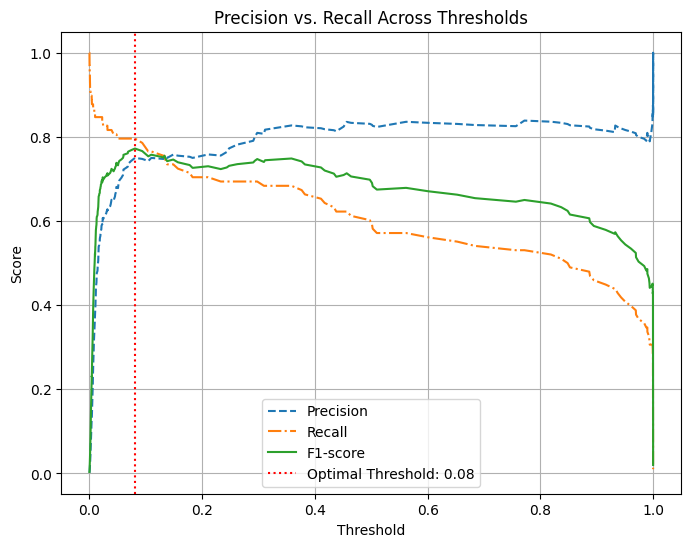

In [83]:

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Find the threshold that optimizes F1-score
f1_scores = (2 * precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', linestyle='--')
plt.plot(thresholds, recall[:-1], label='Recall', linestyle='-.')
plt.plot(thresholds, f1_scores[:-1], label='F1-score', linestyle='-')

plt.axvline(optimal_threshold, color='red', linestyle='dotted', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs. Recall Across Thresholds')
plt.legend()
plt.grid()
plt.show()

In [84]:
y_pred_balanced = (y_probs >= 0.08).astype(int)
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.80      0.77        98

    accuracy                           1.00     56962
   macro avg       0.87      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



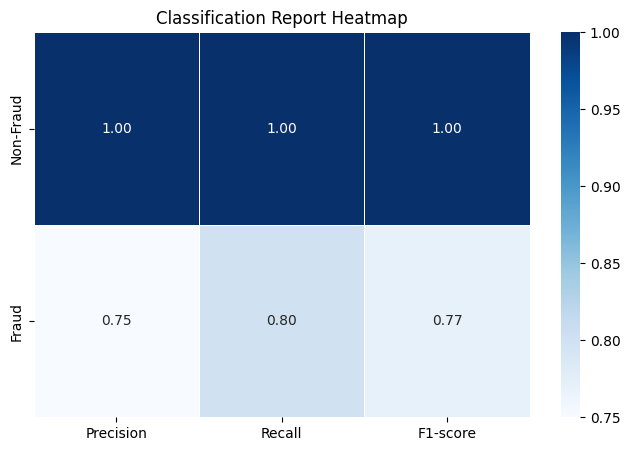

In [85]:
# Metrics from classification report
labels = ["Precision", "Recall", "F1-score"]
fraud = [0.75, 0.80, 0.77]
non_fraud = [1.00, 1.00, 1.00]

# Creating the DataFrame
metrics = np.array([non_fraud, fraud])
df = pd.DataFrame(metrics, columns=labels, index=["Non-Fraud", "Fraud"])

# Plotting
plt.figure(figsize=(8, 5))
sns.heatmap(df, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.show()

In [86]:
#compute type I and type II errors
type_I_error = cm[0, 1]  # False Positive
type_II_error = cm[1, 0]  # False Negative
print(f"Type I Error (False Positive): {type_I_error}")
print(f"Type II Error (False Negative): {type_II_error}")
# Calculate the percentage of fraud cases in the dataset
fraud_percentage = (data['Class'].sum() / len(data)) * 100
print(f"Percentage of Fraud Cases: {fraud_percentage:.2f}%")
# Calculate the percentage of non-fraud cases in the dataset
non_fraud_percentage = 100 - fraud_percentage
print(f"Percentage of Non-Fraud Cases: {non_fraud_percentage:.2f}%")
# Calculate the percentage of Type I and Type II errors
type_I_error_percentage = (type_I_error / len(y_test)) * 100
type_II_error_percentage = (type_II_error / len(y_test)) * 100
print(f"Type I Error Percentage: {type_I_error_percentage:.2f}%")
print(f"Type II Error Percentage: {type_II_error_percentage:.2f}%")


Type I Error (False Positive): 1408
Type II Error (False Negative): 8
Percentage of Fraud Cases: 0.17%
Percentage of Non-Fraud Cases: 99.83%
Type I Error Percentage: 2.47%
Type II Error Percentage: 0.01%


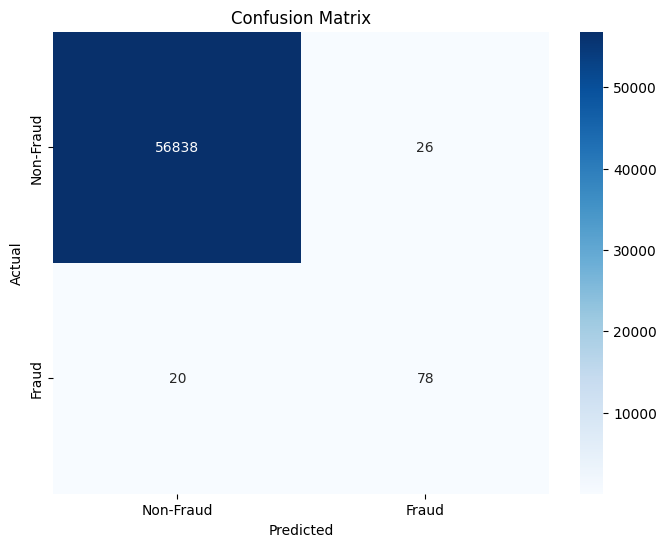

In [87]:
#graph of false positive rate and true positive rate
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_balanced)
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Assessment** <br>

We have improved the recall of the model such that ~75% of fraud cases are classified as fraud. There is more work to be done on the accuracy of the model, finding the correct precision/recall balance. Bias/variance trade-off needs to be assessed. <br/>

An assumption of the logistic regression model is that there should not be outliers in the dataset. As seen in the dataset of credit card data, there are many outliers (which may indicate credit card fraud) so logistic regression may not be the optimal model for this solution.